In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
# 1. Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [3]:
# 2. Build Convolutional Autoencoder
# Encoder 
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2,2), padding='same')(x)

# Decoder
x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3,3), activation='relu', padding='same')(x)


2025-11-07 09:24:42.745584: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-11-07 09:24:42.745761: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-07 09:24:42.745793: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-07 09:24:42.746258: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-07 09:24:42.746672: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
# Models 
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
# 3. Train Autoencoder
history = autoencoder.fit(
    x_train, x_train, 
    epochs = 10, 
    batch_size = 256, 
    shuffle = True, 
    validation_data = (x_test, x_test)
)

Epoch 1/10


2025-11-07 09:27:30.392809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


235/235 ━━━━━━━━━━━━━━━━━━━━ 177s 730ms/step - loss: 0.1392 - val_loss: 0.1194
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 170s 725ms/step - loss: 0.1233 - val_loss: 0.1026
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 170s 724ms/step - loss: 0.1226 - val_loss: 0.1022
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 171s 728ms/step - loss: 0.0980 - val_loss: 0.0910
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 170s 725ms/step - loss: 0.0983 - val_loss: 0.0981
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 172s 733ms/step - loss: 0.0908 - val_loss: 0.0881
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 171s 729ms/step - loss: 0.0910 - val_loss: 0.0896
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 172s 731ms/step - loss: 0.0911 - val_loss: 0.4135
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 172s 730ms/step - loss: 0.1130 - val_loss: 0.0937
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 171s 728ms/step - loss: 0.0924 - val_loss: 0.0873


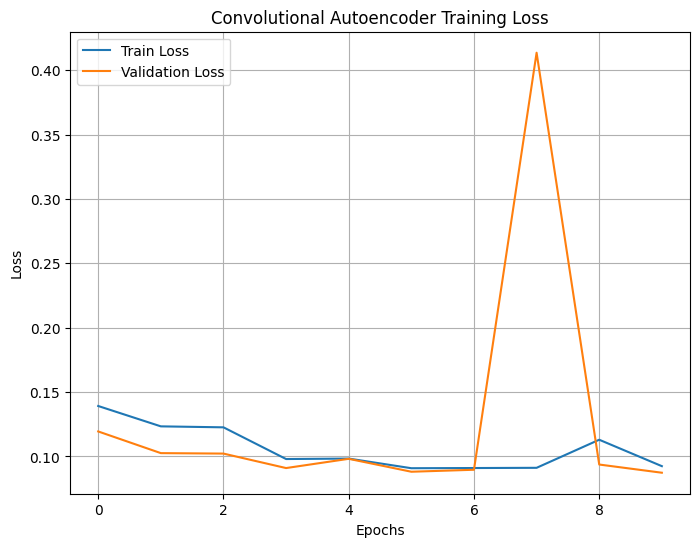

In [6]:
# 4. Plot Training Loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Convolutional Autoencoder Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


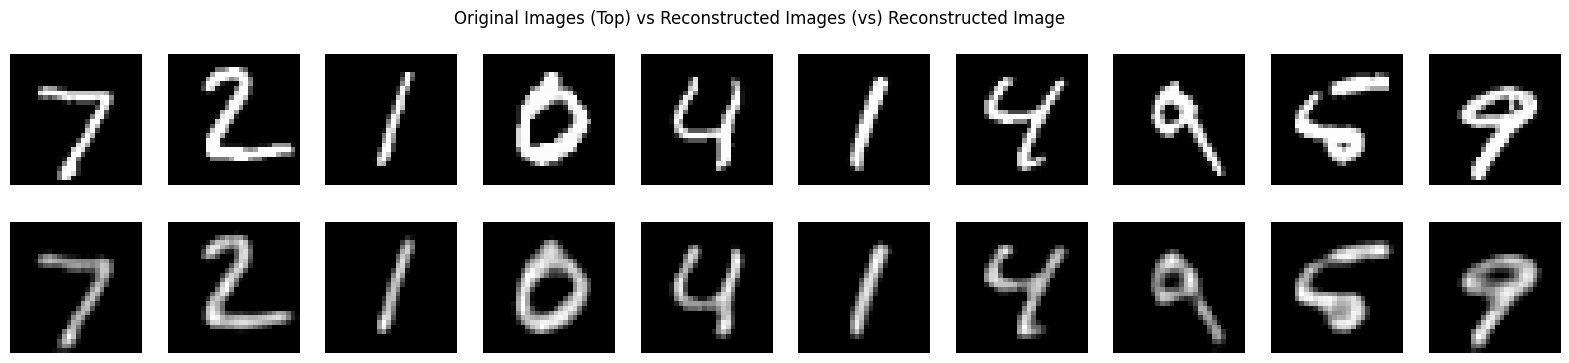

In [7]:
# 5. Encode and Decode Image
decoded_imgs = autoencoder.predict(x_test)

# 6. Visualization: Original vs Reconstructed
n = 10
plt.figure(figsize=(20, 4))
for i in range(n): 
    # Original 
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.suptitle("Original Images (Top) vs Reconstructed Images (vs) Reconstructed Image")
plt.show()
    

In [8]:
# 7. Evaluate Reconstruction Quality
mse = mean_squared_error(x_test.reshape(len(x_test), -1), 
                         decoded_imgs.reshape(len(decoded_imgs), -1))
print(f"Reconstruction MSE: {mse:.6f}")


Reconstruction MSE: 0.007290
